In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
random.seed = 69

In [2]:
def egreedy(s, Q, epsilon):
    vals = Q[s]
    inds = vals!= np.ma.masked
    acts = np.array([0, 1, 2, 3])
    acts = acts[inds]
    p = np.random.rand()
    
    if p < epsilon:
        u = np.random.choice(acts, 1)
        return u[0]
    else:
        return np.argmax(vals)

def learn(Q, s, s_prime, a, envt, lr, gamma):
    pred = Q[s, a]
    targ = envt[s_prime] - 2 + gamma*np.max(Q[s_prime]) # s or s_prime
    Q[s, a] = Q[s, a] + lr*(targ - pred)
    return Q

def makeEnvt(M, N):
    envt = np.zeros(N**2)
    holes = random.sample(range(1, N**2-1), M)
    for i in range(N**2):
        if i in holes:
            envt[i] = -100
    envt[N**2 - 1] = 100
    return envt

def play(Q, envt, lr, gamma, epsilon, N):
    s = 0
    tot_rew = 0
    steps = 0
    while (s != N**2 - 1):
        steps = steps + 1
        a = egreedy(s, Q, epsilon)
#         print("state = ",s, "action = ", a)
        if a == 0:
            s_prime = s - N
        elif a == 1:
            s_prime = s + 1
        elif a == 2:
            s_prime = s + N
        else:
            s_prime = s - 1
        # print(s, a, s_prime)
        tot_rew += envt[s_prime]
        Q = learn(Q, s, s_prime, a, envt, lr, gamma)
        s = s_prime
        
    return Q, tot_rew, steps

[[   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [-100.    0. -100.    0.]
 [-100.    0.    0.  100.]]


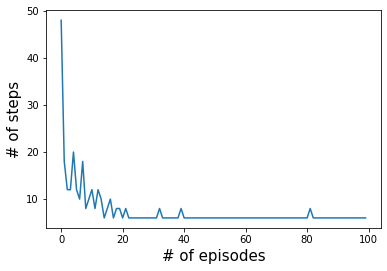

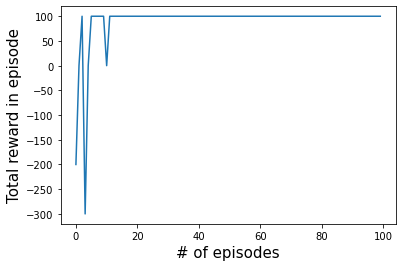

In [3]:
N = 4
M = 3
lr = 0.06
gamma = 0.99
epsilon = 0.01
rews = []

envt = np.genfromtxt('env.csv', delimiter = ',')
# envt = makeEnvt(M, N)
print(np.reshape(envt, (N, N)))
rewards = []
for u in range(1):
    Q = np.ma.zeros((N**2, 4))
    for i in range(N**2):
        if i%N == 0:                       # move left
            Q[i,3] = np.ma.masked
        if (i+1)%N == 0:             # move right
            Q[i,1] = np.ma.masked
        if i < N:                       # move up
            Q[i,0] = np.ma.masked
        if i >= N*(N-1):                     # move down
            Q[i,2] = np.ma.masked        
    rews = []
    steps = []
    episodes = 100
    for t in range(episodes):
#         print(u,t)
        Q, rew, step = play(Q, envt, lr, gamma, epsilon, N)
        rews.append(rew)
        steps.append(step)
    rewards.append(rews)

rewards = np.array(rewards)
rewards = np.mean(rewards, 0)
plt.plot(range(episodes), steps)
plt.xlabel('# of episodes', fontsize = 15)
plt.ylabel('# of steps', fontsize = 15)

plt.figure()
plt.plot(rewards)
plt.xlabel('# of episodes', fontsize = 15)
plt.ylabel('Total reward in episode', fontsize = 15)


plt.show()